Usted hace parte del equipo de experiencia de clientes de una compañía de
telecomunicaciones y tienen una preocupación que por la llegada de un nuevo competidor
a la industria tengan retiro masivo de clientes, lo que pone en riesgo la continuidad del
negocio. Para esto le encargan que trate de estimar la cantidad de clientes que pueden
retirarse teniendo en cuenta el tiempo en meses que lleva el cliente abonado, la cantidad
de quejas interpuestas y la cantidad de servicios conectados por la compañía. Usted hizo un
análisis completo del negocio y encontró los siguientes datosteniendo una masa de clientes
de 10.000

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import skfuzzy
from skfuzzy import control as ctrl
import warnings

In [3]:
warnings.filterwarnings('ignore')

# 1 Visualizacion de los conjuntos borrosos de los antecedentes

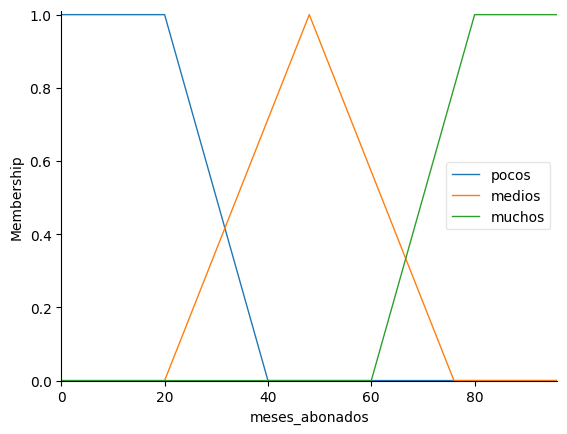

In [10]:
#Retiros en comparacion con meses abonados
meses_abonados = ctrl.Antecedent(np.arange(0,97,1), 'meses_abonados')
meses_abonados['pocos']=skfuzzy.trapmf(meses_abonados.universe,[0,0,20,40])
meses_abonados['medios']=skfuzzy.trimf(meses_abonados.universe,[20,48,76])
meses_abonados['muchos']=skfuzzy.trapmf(meses_abonados.universe,[60,80,96,96])
meses_abonados.view()
plt.show()

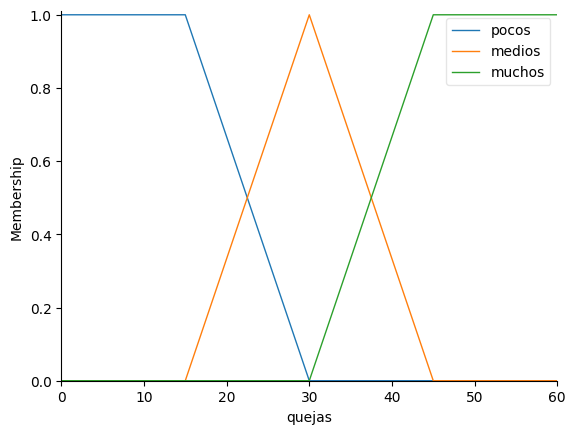

In [11]:
#cantidad de quejas
quejas = ctrl.Antecedent(np.arange(0,61,1), 'quejas')
quejas['pocos']=skfuzzy.trapmf(quejas.universe,[0,0,15,30])
quejas['medios']=skfuzzy.trimf(quejas.universe,[15,30,45])
quejas['muchos']=skfuzzy.trapmf(quejas.universe,[30,45,60,60])
quejas.view()
plt.show()


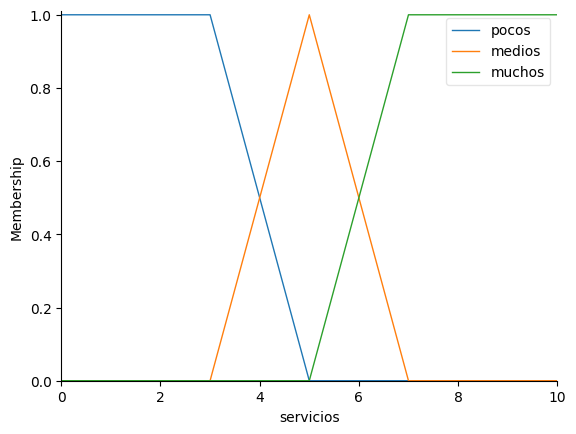

In [12]:
#Numero de servicios
servicios = ctrl.Antecedent(np.arange(0,11,1), 'servicios')
servicios['pocos']=skfuzzy.trapmf(servicios.universe,[0,0,3,5])# [0,0,2,4]
servicios['medios']=skfuzzy.trimf(servicios.universe,[3,5,7])
servicios['muchos']=skfuzzy.trapmf(servicios.universe,[5,7,10,10])
servicios.view()
plt.show()

# 2 Declarar las variables para el SIB TSK

In [13]:
#Antecedentes
#Meses abonados
meses_abonados = np.arange(0,97,1)
meses_abonados_pocos = skfuzzy.trapmf(meses_abonados,[0,0,20,40])
meses_abonados_medios = skfuzzy.trimf(meses_abonados,[20,48,76])
meses_abonados_muchos = skfuzzy.trapmf(meses_abonados,[60,80,96,96])

#Quejas
quejas = np.arange(0,61,1)
quejas_pocas = skfuzzy.trapmf(quejas,[0,0,15,30])
quejas_medias = skfuzzy.trimf(quejas,[15,30,45])
quejas_muchas = skfuzzy.trapmf(quejas,[30,45,60,60])

#servicios
servicios = np.arange(0,11,1)
servicios_pocos = skfuzzy.trapmf(servicios,[0,0,3,5]) 
servicios_medios = skfuzzy.trimf(servicios,[3,5,7]) 
servicios_muchos = skfuzzy.trapmf(servicios,[5,7,10,10])



# 3. Defuzzificacion

In [25]:
  # Pendientes gráfica Retiros en comparación con meses abonados
    # m= (y2-y1)/(x2-x1) 
m1 = (5000-10000)/(30-0) #pocos
m2 = (1000-5000)/(48-30) #medios
m3 = (10-1000)/(96-48) #muchos
    
    # Pendientes gráfica Retiros en comparación con cantidad de quejas
m4 = (1500-500)/(15-0) #pocas
m5 = (4500-1500)/(45-15) #medias
m6 = (10000-4500)/(60-45) #muchas

    # Pendientes gráfica Retiros en comparación con número de servicios
m7 = (7000-10000)/(3-0) #pocos
m8 = (1500-7000)/(7-3) #medios
m9 = (300-1500)/(10-7) #muchos
pendientes = [m1, m2,m3,m4,m5,m6,m7,m8,m9]

for i in pendientes:
    print(i)



-166.66666666666666
-222.22222222222223
-20.625
66.66666666666667
100.0
366.6666666666667
-1000.0
-1375.0
-400.0


In [27]:
# y-y1 = m1(x-x1)
    # y + 10000 = m1x - m1*30
    # y =
b1 = 10000
b2 = -30*m2 + 5000
b3 = -48*m3 + 1000 
b4 = 500
b5 = -15*m5 + 1500
b6 = -45*m6 +4500
b7 = 10000
b8 = -3*m8 + 7000
b9 = -7*m9 + 1500

In [28]:

# M: meses
# Q: quejas
# S: servicios
m1
def resultado(M,Q,S):
    
  
     
    r1 = m1*M + m4*Q + m7*S +b1+b4+b7
    r2 = m1*M + m4*Q + m8*S +b1+b4+b8
    r3 = m1*M + m4*Q + m9*S +b1+b4+b9
    
    r4 = m1*M + m5*Q + m7*S +b1+b5+b7
    r5 = m1*M + m5*Q + m8*S +b1+b5+b8
    r6 = m1*M + m5*Q + m9*S +b1+b5+b9
    
    r7 = m1*M + m6*Q + m7*S +b1+b6+b7
    r8 = m1*M + m6*Q + m8*S +b1+b6+b8
    r9 = m1*M + m6*Q + m9*S +b1+b6+b9

    r10 = m2*M + m4*Q + m7*S +b2+b4+b7
    r11 = m2*M + m4*Q + m8*S +b2+b4+b8
    r12 = m2*M + m4*Q + m9*S +b2+b4+b9
    
    r13 = m2*M + m5*Q + m7*S +b2+b5+b7
    r14 = m2*M + m5*Q + m8*S +b2+b5+b8
    r15 = m2*M + m5*Q + m9*S +b2+b5+b9
    
    r16 = m2*M + m6*Q + m7*S +b2+b6+b7
    r17 = m2*M + m6*Q + m8*S +b2+b6+b8
    r18 = m2*M + m6*Q + m9*S +b2+b6+b9
    
    r19 = m3*M + m4*Q + m7*S +b3+b4+b7
    r20 = m3*M + m4*Q + m8*S +b3+b4+b8
    r21 = m3*M + m4*Q + m9*S +b3+b4+b9
    
    r22 = m3*M + m5*Q + m7*S +b3+b5+b7
    r23 = m3*M + m5*Q + m8*S +b3+b5+b8
    r24 = m3*M + m5*Q + m9*S +b3+b5+b9
    
    r25 = m3*M + m6*Q + m7*S +b3+b6+b7
    r26 = m3*M + m6*Q + m8*S +b3+b6+b8
    r27 = m3*M + m6*Q + m9*S +b3+b6+b9


    Mu1 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu2 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu3 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu4 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu5 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu6 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu7 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu8 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu9 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_pocos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))

    Mu10 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu11 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu12 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu13 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu14 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu15 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu16 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu17 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu18 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_medios,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))

    Mu19 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu20 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu21 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_pocas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu22 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu23 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu24 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_medias,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))
    Mu25 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_pocos,S))
    Mu26 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_medios,S))
    Mu27 = min(skfuzzy.interp_membership(meses_abonados,meses_abonados_muchos,M),skfuzzy.interp_membership(quejas,quejas_muchas,Q), skfuzzy.interp_membership(servicios,servicios_muchos,S))


    return (r1*Mu1+r2*Mu2+r3*Mu3+r4*Mu4+r5*Mu5+r6*Mu6+r7*Mu7+r8*Mu8+r9*Mu9+r10*Mu10+r11*Mu11+r12*Mu12+r13*Mu13+r14*Mu14+r15*Mu15+r16*Mu16+r17*Mu17+r18*Mu18+r19*Mu19+r20*Mu20+r21*Mu21+r22*Mu22+r23*Mu23+r24*Mu24+r25*Mu25+r26*Mu26+r27*Mu27)/(Mu1+Mu2+Mu3+Mu4+Mu5+Mu6+Mu7+Mu8+Mu9+Mu10+Mu11+Mu12+Mu13+Mu14+Mu15+Mu16+Mu17+Mu18+Mu19+Mu20+Mu21+Mu22+Mu23+Mu24+Mu25+Mu26+Mu27)



In [29]:
print(f'Escenario 1: {resultado(12,10,3)}')
print(f'Escenario 2: {resultado(20,60,5)}')
print(f'Escenario 3: {resultado(40,15,8)}')
print(f'Escenario 4: {resultado(62,40,6)}')

Escenario 1: 16166.666666666668
Escenario 2: 20916.666666666668
Escenario 3: 5377.777777777779
Escenario 4: 4048.4587813620087
